In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#load dataset
#train_df_og = pd.read_csv('/content/drive/MyDrive/ITESM/IA avanzada VII/B1 Reto/house-prices-advanced-regression-techniques/train.csv')
train_df_og = pd.read_csv('/content/drive/Shareddrives/IA/house-prices-advanced-regression-techniques (2)/train.csv')
#test_df_og = pd.read_csv('/content/drive/MyDrive/ITESM/IA avanzada VII/B1 Reto/house-prices-advanced-regression-techniques/test.csv')
test_df_og = pd.read_csv('/content/drive/Shareddrives/IA/house-prices-advanced-regression-techniques (2)/test.csv')

#y_test = pd.read_csv('/content/drive/MyDrive/ITESM/IA avanzada VII/B1 Reto/house-prices-advanced-regression-techniques/sample_submission.csv')

train_df_og.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


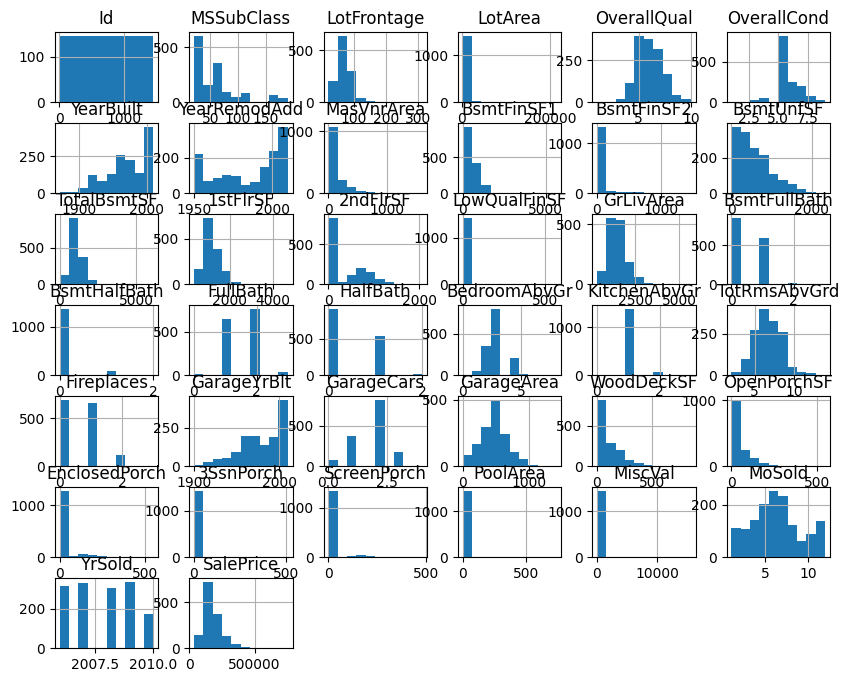

In [21]:
train_df_og.hist(figsize=(10,8));

In [22]:
train_df_og.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
def ordinal_encoder(df):

  qual_columns = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual']

  dict_qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}
  dict_BE = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, np.nan:0}
  dict_FinType = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.nan:0}

  for column in qual_columns:
    for i in range(len(df[column])):
      if df[column].iloc[i] !=0:
        df[column].iloc[i] = dict_qual[df[column].iloc[i]]

  column = 'BsmtExposure'
  for i in range(len(df[column])):
      if df[column].iloc[i] !=0:
        df[column].iloc[i] = dict_BE[df[column].iloc[i]]

  column = 'BsmtFinType1'
  for i in range(len(df[column])):
      if df[column].iloc[i] !=0:
        df[column].iloc[i] = dict_FinType[df[column].iloc[i]]

  df.ExterQual = df.ExterQual.astype(int)
  df.BsmtQual = df.BsmtQual.astype(int)
  df.HeatingQC = df.HeatingQC.astype(int)
  df.KitchenQual = df.KitchenQual.astype(int)

  return df

In [24]:
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', None)

def clean_data(dataset, set, means=None, low_corr=None):

  ordinal_encoder(dataset) #encode ordinal features

  dataset.set_index('Id', inplace=True) #set Id column as index

  #drop columns with many NAs (>500)
  high_na = dataset.isna().sum()[dataset.isna().sum()>500].index
  dataset.drop(high_na, axis=1, inplace=True)

  #Drop de variables altamente correlacionadas (>0.80)
  dataset.drop(['TotRmsAbvGrd', 'GarageYrBlt', 'TotalBsmtSF','GarageCars'], axis=1, inplace=True)

  #Drop variables con baja cardinalidad o data leaking
  dataset.drop(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BsmtCond',
          'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'BsmtFinType2',
          'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'BldgType', 'ExterCond', 'BsmtFullBath'], axis=1, inplace=True)

  #YearRemodAdd
  dataset['remodel'] = (dataset['YearRemodAdd']!= dataset['YearBuilt']).astype(int)
  dataset.drop('YearRemodAdd', axis = 1, inplace=True)

  #input modes in left NAs
  low_na = dataset.isna().sum()[dataset.isna().sum()>0].index
  modes = dataset[low_na].mode().iloc[0]
  dataset[low_na] = dataset[low_na].fillna(modes)

  if set=='train':

    #drop de variables con baja correlación al target (-0.2 < x < 0.2)
    low_corr = dataset.corr().iloc[-2][(dataset.corr().iloc[-2]<0.2) & (dataset.corr().iloc[-2]>-0.2)].index
    dataset.drop(low_corr, axis=1, inplace=True)

    cat_columns = dataset.select_dtypes(include=['object']).columns
    means_dict = {}
    for col in cat_columns:
      means = dataset.groupby(col)['SalePrice'].mean().to_dict()
      means_dict[col] = means
      dataset[col] = dataset.groupby(col)['SalePrice'].transform('mean')

    target = dataset['SalePrice']
    dataset.drop('SalePrice', axis=1, inplace=True)

    return dataset, target, means_dict, low_corr

  elif set=='test':

    dataset.drop(low_corr, axis=1, inplace=True)

    cat_columns = dataset.select_dtypes(include=['object']).columns
    for col in cat_columns:
      for row in range(dataset.shape[0]):
        dataset[col].iloc[row] = means[col][dataset[col].iloc[row]]

    return dataset

In [25]:
X_train, y_train, means_dict, low_corr = clean_data(train_df_og, set='train')
X_test = clean_data(test_df_og, set='test', means=means_dict, low_corr=low_corr)

<ipython-input-23-009e7b08aba3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i] = dict_qual[df[column].iloc[i]]
<ipython-input-23-009e7b08aba3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i] = dict_BE[df[column].iloc[i]]
<ipython-input-23-009e7b08aba3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i] = dict_FinType[df[column].iloc[i]]
<ipython-input-24-0dea8e1d8a5b>:35: Fut

In [26]:
X_train.describe()

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,YearBuilt,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,68.267123,10516.828082,180921.195890,180921.195890,180921.195890,180921.195890,6.099315,1971.267808,180921.195890,180921.195890,180921.195890,180921.195890,103.117123,3.39589,180921.195890,3.489041,180921.195890,180921.195890,443.639726,567.240411,4.145205,1162.626712,346.992466,1515.463699,1.565068,0.382877,3.511644,0.613014,180921.195890,180921.195890,472.980137,94.244521,46.660274
std,26054.196011,22.356355,9981.264932,21954.853407,11517.619038,58678.654296,23339.421467,1.382997,30.202904,19082.186780,31051.057604,31158.263158,34010.010238,180.731373,0.57428,40223.991680,0.876478,30716.660444,36475.306046,456.098091,441.866955,0.959501,386.587738,436.528436,525.480383,0.550916,0.502885,0.663760,0.644666,32698.182545,43087.640241,213.804841,125.338794,66.256028
min,74528.000000,21.000000,1300.000000,164754.818378,176938.047529,98576.470588,110150.000000,1.000000,1872.000000,148909.090909,71000.000000,105000.000000,146318.066667,0.000000,2.00000,107365.625000,0.000000,107938.342105,105652.891892,0.000000,0.000000,1.000000,334.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,109962.111111,137570.460641,0.000000,0.000000,0.000000
25%,191004.994787,60.000000,7553.500000,164754.818378,176938.047529,136793.135135,175985.477961,5.000000,1954.000000,171483.956179,149841.645631,149803.172897,156958.243119,0.000000,3.00000,149805.714511,3.000000,165652.295908,151852.702703,0.000000,223.000000,3.000000,882.000000,0.000000,1129.500000,1.000000,0.000000,3.000000,0.000000,134091.162791,137570.460641,334.500000,0.000000,0.000000
50%,191004.994787,63.000000,9478.500000,164754.818378,176938.047529,186555.796610,175985.477961,6.000000,1973.000000,171483.956179,175942.379630,168112.387324,156958.243119,0.000000,3.00000,149805.714511,4.000000,165652.295908,170670.576744,383.500000,477.500000,5.000000,1087.000000,0.000000,1464.000000,2.000000,0.000000,3.000000,1.000000,194411.473186,202068.869668,480.000000,0.000000,25.000000
75%,191004.994787,79.000000,11601.500000,206101.665289,177934.574468,197965.773333,210051.764045,7.000000,2000.000000,171483.956179,213732.900971,214432.460317,204691.871910,164.250000,4.00000,225230.442040,4.000000,192789.657895,235413.720096,712.250000,808.000000,5.000000,1391.250000,728.000000,1776.750000,2.000000,1.000000,4.000000,1.000000,194411.473186,202068.869668,576.000000,168.000000,68.000000
max,214014.061538,313.000000,215245.000000,239833.365854,223854.617021,335295.317073,220000.000000,10.000000,2010.000000,225000.000000,262000.000000,319000.000000,265583.625000,1600.000000,5.00000,225230.442040,5.000000,257689.805970,235413.720096,5644.000000,2336.000000,5.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,5.000000,3.000000,254751.738636,240052.690341,1418.000000,857.000000,547.000000


In [27]:
name='mtrained_model_data_description.csv'
# Create a DataFrame with columns "Id" and "SalePrice"
df = X_train.describe()

# Save the DataFrame to a CSV file with headers
df.to_csv(name, index=False)

print(f'DataFrame saved to {name}')

DataFrame saved to mtrained_model_data_description.csv


In [28]:
X_test.shape

(1459, 34)

In [29]:
X_train.shape

(1460, 34)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

model = Pipeline([
    ('preprocessor', MinMaxScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(34, 64),
                                       alpha=1.3,
                                       activation='relu', solver='lbfgs',
                                       random_state=10))
])

# model = Pipeline([
#     ('preprocessor', MinMaxScaler()),
#     ('tree_regressor', DecisionTreeRegressor(criterion='absolute_error'))
# ])


#data split
from sklearn.model_selection import train_test_split
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_train, y_train, train_size=0.7, random_state=10)

#cross val
scores = cross_val_score(model, X_train_t, y_train_t, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
# Print the cross-validation results
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

from sklearn.metrics import mean_squared_error, r2_score
model.fit(X_train_t, y_train_t)
y_pred = model.predict(X_test_t)
r2 = r2_score(y_test_t, y_pred)
mse = mean_squared_error(y_test_t, y_pred)
rmse = np.sqrt(mse)
print(f'R2 score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Cross-Validation RMSE Scores: [39226.46896477 37382.14965897 43364.96022415 38610.78853731
 30263.52260211]
Mean RMSE: 37769.57799746202
R2 score: 0.8704790011925386
MSE: 759456952.2512698
RMSE: 27558.246538037754


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [31]:
y_pred_test = model.predict(X_test)

In [32]:
name='preds.csv'
# Create a DataFrame with columns "Id" and "SalePrice"
df = pd.DataFrame({'Id': np.arange(1461, len(y_pred_test) + 1461), 'SalePrice': y_pred_test})

# Save the DataFrame to a CSV file with headers
df.to_csv(name, index=False)

print(f'DataFrame saved to {name}')

DataFrame saved to preds.csv


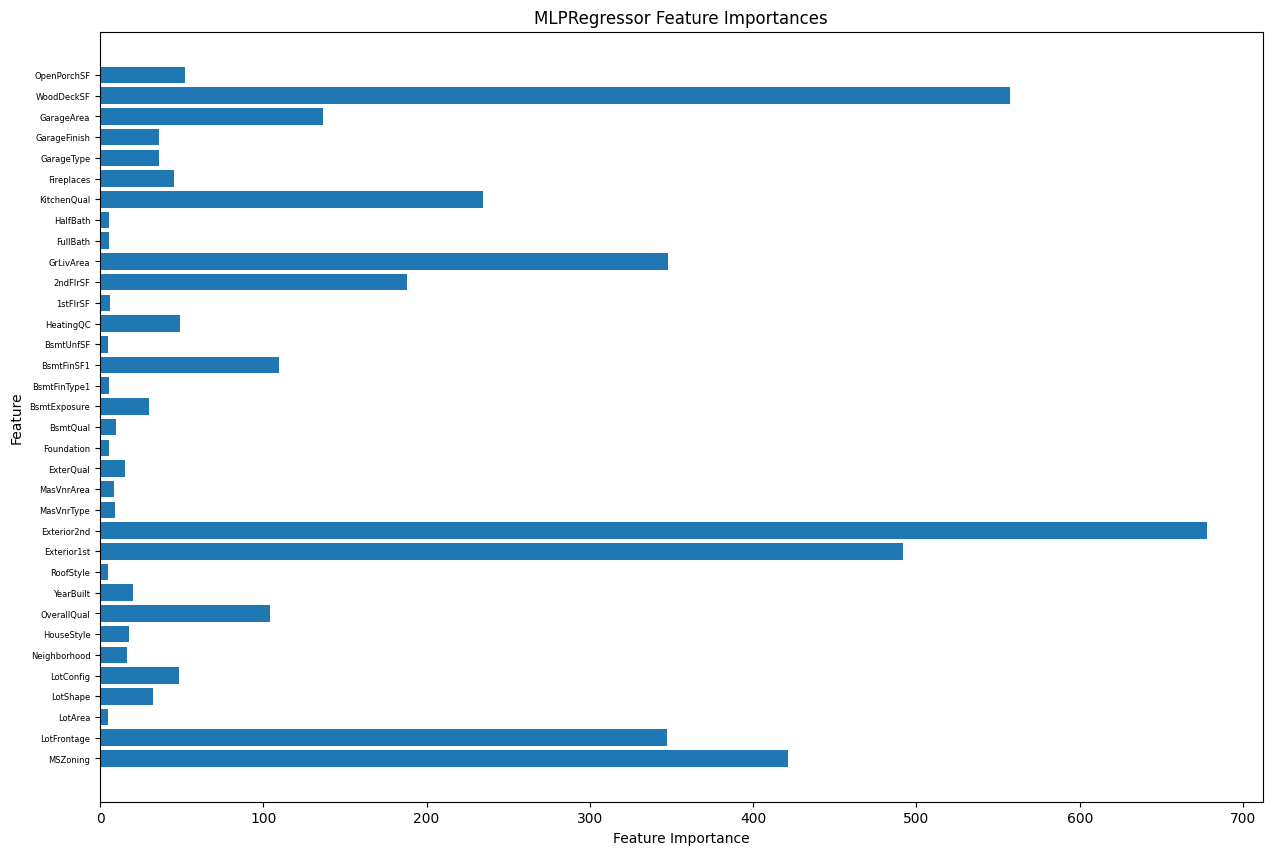

In [33]:
mlp_regressor = model.named_steps['mlp']

# Retrieve the coefficients (weights) from the model
coefficients = mlp_regressor.coefs_[0]  # First hidden layer weights

# Calculate feature importances based on coefficients (optional)
feature_importances = np.abs(coefficients).sum(axis=0)

# Get feature names or indices (replace with your actual feature names)
feature_names = X_test.columns

# Create a bar plot of feature importances
plt.figure(figsize=(15,10))
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(feature_importances)), feature_names, size=6)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('MLPRegressor Feature Importances')
plt.show()



In [34]:
feature_importances

array([421.43459385, 347.00105314,   5.16691698,  32.24657481,
        48.30397988,  16.21463892,  17.94888308, 103.78970235,
        20.42159497,   4.95503998, 491.84743429, 678.04114043,
         9.05005941,   8.53882954,  15.06981505,   5.52043   ,
        10.02415903,  30.06044575,   5.67158595, 109.36451885,
         4.96304956,  48.84621158,   5.81482966, 187.90110527,
       347.6629047 ,   5.63151038,   5.55913962, 234.76399968,
        45.56398981,  36.17780946,  35.88894979, 136.3376163 ,
       557.40121983,  52.26703184])